In [1]:
from google.colab import files
uploaded = files.upload()


Saving netflix_movies_detailed_up_to_2025.csv to netflix_movies_detailed_up_to_2025.csv


In [2]:
# 📥 Step 2: Load dataset
import pandas as pd

df = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')
print("Initial data shape:", df.shape)
df.head()


Initial data shape: (16000, 18)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,16-05-2010,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",15-07-2010,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",17-11-2010,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,24-11-2010,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,18-03-2010,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [5]:
# 🧹 Step 3: Data Cleaning
# -- Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [6]:
# -- Drop duplicates
df.drop_duplicates(inplace=True)


In [7]:
# -- Clean text columns
text_cols = ['title', 'director', 'cast', 'country', 'rating', 'genre']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()


In [12]:
# -- Split genres for further analysis
df['genre_list'] = df['genres'].str.split(',')


In [13]:
# -- Extract year from date_added
df['year_added'] = df['date_added'].dt.year


In [14]:
# 🔍 Check cleaned data
print("Cleaned data shape:", df.shape)
df.info()


Cleaned data shape: (16000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       16000 non-null  int64         
 1   type          16000 non-null  object        
 2   title         16000 non-null  object        
 3   director      16000 non-null  object        
 4   cast          16000 non-null  object        
 5   country       16000 non-null  object        
 6   date_added    16000 non-null  datetime64[ns]
 7   release_year  16000 non-null  int64         
 8   rating        16000 non-null  object        
 9   duration      0 non-null      float64       
 10  genres        15893 non-null  object        
 11  language      16000 non-null  object        
 12  description   15868 non-null  object        
 13  popularity    16000 non-null  float64       
 14  vote_count    16000 non-null  int64         
 15  vote

📊 Charts & Visualizations:

In [18]:
# 📈 Plotting setup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


# 📅 Number of Movies Added Each Year

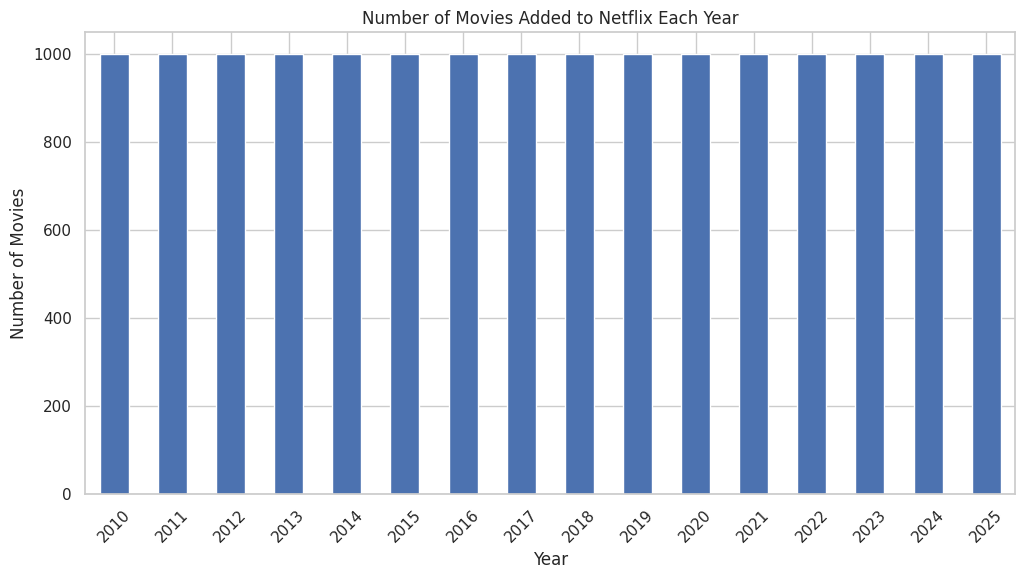

In [17]:
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Movies Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


# 🎭 Top 10 Genres

In [22]:
from collections import Counter



In [23]:
genre_counts = Counter([g.strip() for sublist in df['genre_list'].dropna() for g in sublist])

In [24]:
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

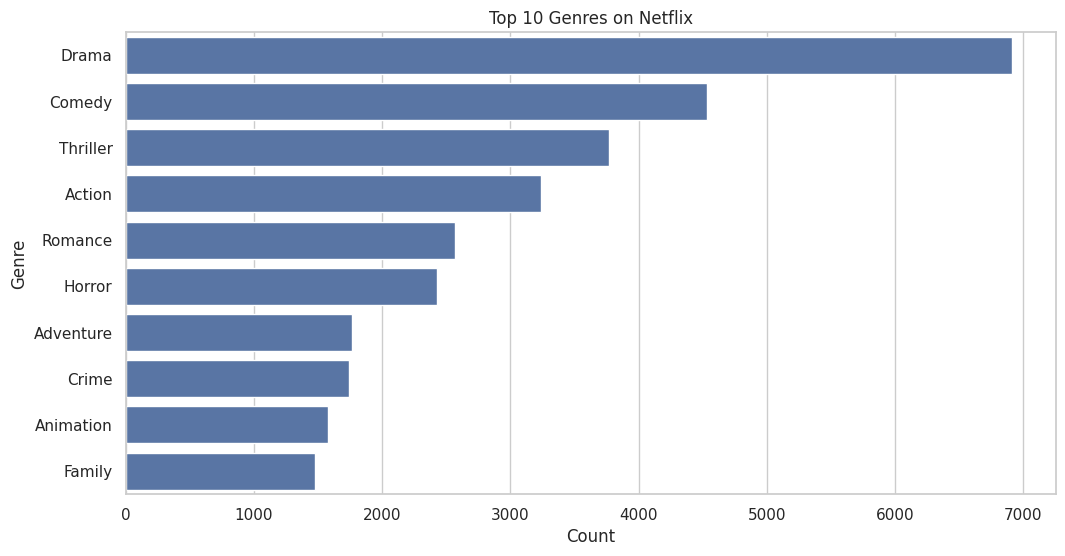

In [30]:
sns.barplot(x='Count', y='Genre', data=top_genres)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# 📊 Ratings Distribution

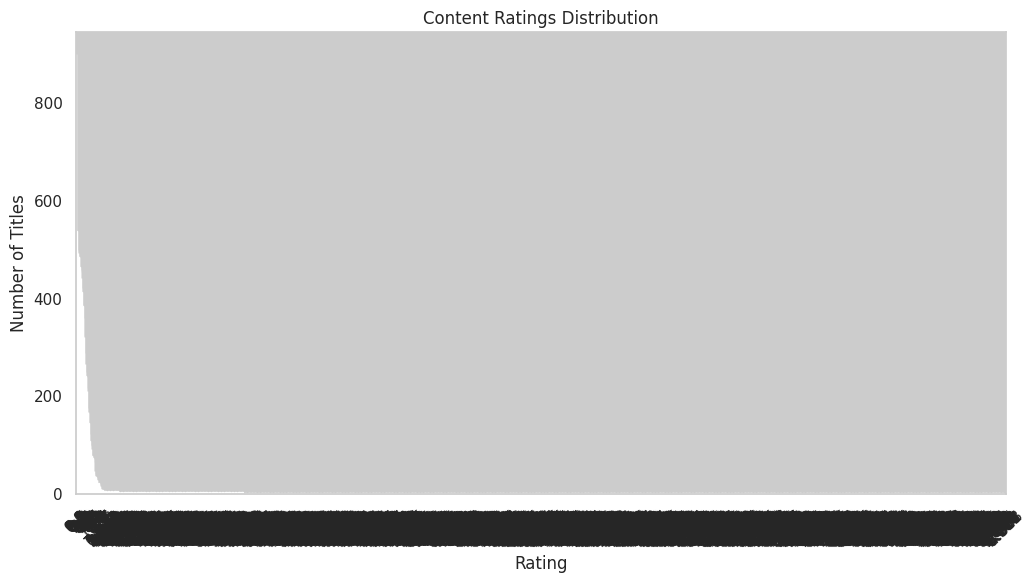

In [31]:
df['rating'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Content Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


# 🌍 Top 10 Countries

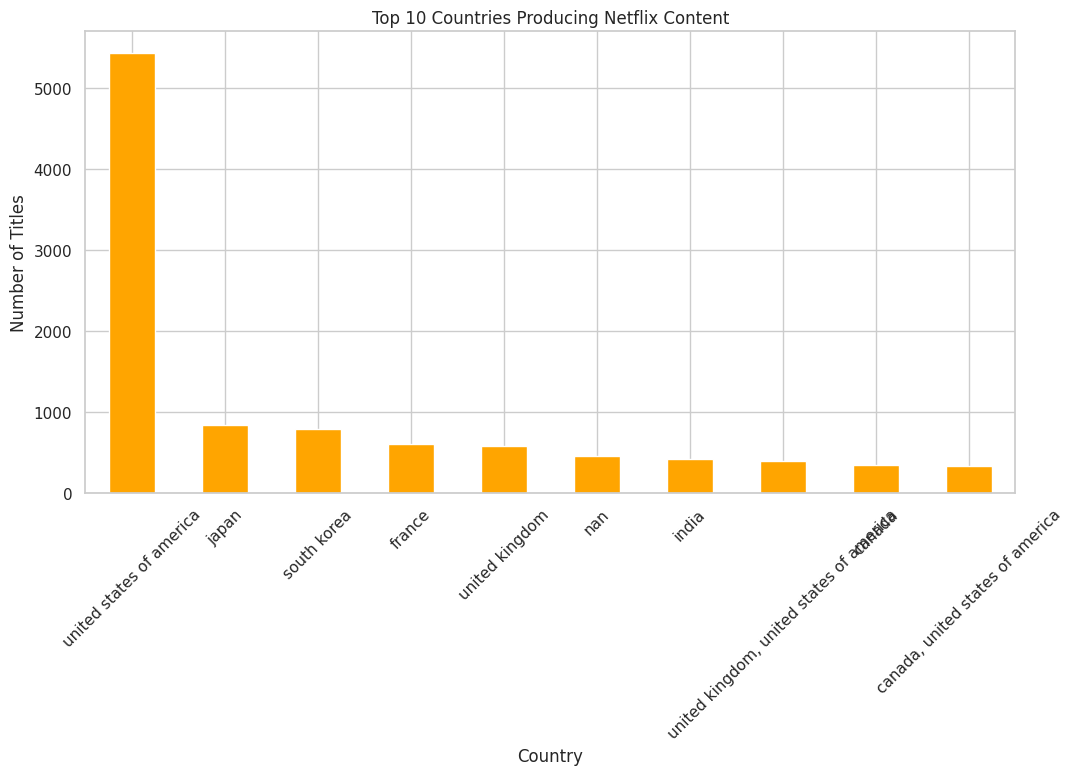

In [32]:
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()
